#**TimeSeriesForecasting_Deep_Learning**

## LSTM model

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import LSTM, Dense, Flatten, Bidirectional, GRU, SimpleRNN

In [ ]:
def prepare_data(timeseries_data, n_features):
  x, y = [],[]
  for i in range(len(timeseries_data)):
    end_ix = i + n_features
    if end_ix > len(timeseries_data) -1:
      break
    seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  return np.array(x), np.array(y)

In [ ]:
timeseries_data = [100,120,135,145,150,160,185,200,225,300]
n_steps = 3
x, y = prepare_data(timeseries_data, n_steps)

In [ ]:
print(x)

[[100 120 135]
 [120 135 145]
 [135 145 150]
 [145 150 160]
 [150 160 185]
 [160 185 200]
 [185 200 225]]


In [ ]:
print(y)

[145 150 160 185 200 225 300]


In [ ]:
x.shape

(7, 3)

In [ ]:
y.shape

(7,)

In [ ]:
# reshape from [sample, timesteps] into [samples, timesteps, features]
n_features = 1
x = x.reshape(x.shape[0], x.shape[1], n_features)

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 7s 7s/step - loss: 41140.3672
Epoch 2/200
1/1 [==============================] - 0s 20ms/step - loss: 40575.3711
Epoch 3/200
1/1 [==============================] - 0s 21ms/step - loss: 40202.2539
Epoch 4/200
1/1 [==============================] - 0s 19ms/step - loss: 39917.3750
Epoch 5/200
1/1 [==============================] - 0s 18ms/step - loss: 39660.9453
Epoch 6/200
1/1 [==============================] - 0s 24ms/step - loss: 39390.3438
Epoch 7/200
1/1 [==============================] - 0s 21ms/step - loss: 39060.3242
Epoch 8/200
1/1 [==============================] - 0s 22ms/step - loss: 38598.5859
Epoch 9/200
1/1 [==============================] - 0s 21ms/step - loss: 37894.6445
Epoch 10/200
1/1 [==============================] - 0s 20ms/step - loss: 36910.8711
Epoch 11/200
1/1 [==============================] - 0s 27ms/step - loss: 35867.5938
Epoch 12/200
1/1 [==============================] - 0s 20ms/step - loss: 34999.2188
Epo

In [ ]:
# predicting for the next 25 revenue data

x_input = np.array([200,225,300])
temp_input = list(x_input)
output = []

i = 0
while(i<10):
  if(len(temp_input)>3):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print("{} day input {}".format(i, yhat))
    temp_input.append(yhat[0][0])
    temp_input = temp_input[1:]
    output.append(yhat[0][0])
    i = i+1
  else:
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.append(yhat[0][0])
    output.append(yhat[0][0])
    i = i+1
print(output)

[353.16452]
1 day input [225.         300.         353.16452026]
1 day input [[418.79446]]
2 day input [300.         353.16452026 418.79446411]
2 day input [[533.27216]]
3 day input [353.16452 418.79446 533.27216]
3 day input [[645.2775]]
4 day input [418.79446 533.27216 645.2775 ]
4 day input [[784.1492]]
5 day input [533.27216 645.2775  784.1492 ]
5 day input [[976.3839]]
6 day input [645.2775 784.1492 976.3839]
6 day input [[1191.4551]]
7 day input [ 784.1492  976.3839 1191.4551]
7 day input [[1459.5784]]
8 day input [ 976.3839 1191.4551 1459.5784]
8 day input [[1802.1812]]
9 day input [1191.4551 1459.5784 1802.1812]
9 day input [[2206.6523]]
[353.16452, 418.79446, 533.27216, 645.2775, 784.1492, 976.3839, 1191.4551, 1459.5784, 1802.1812, 2206.6523]


In [ ]:
timeseries_data

[100, 120, 135, 145, 150, 160, 185, 200, 225, 300]

In [ ]:
output

[353.16452,
 418.79446,
 533.27216,
 645.2775,
 784.1492,
 976.3839,
 1191.4551,
 1459.5784,
 1802.1812,
 2206.6523]

In [ ]:
print(len(timeseries_data)), print(len(output))

10
10


(None, None)

In [ ]:
import matplotlib.pyplot as plt
day_new = np.arange(0,10)
day_pred = np.arange(10,20)

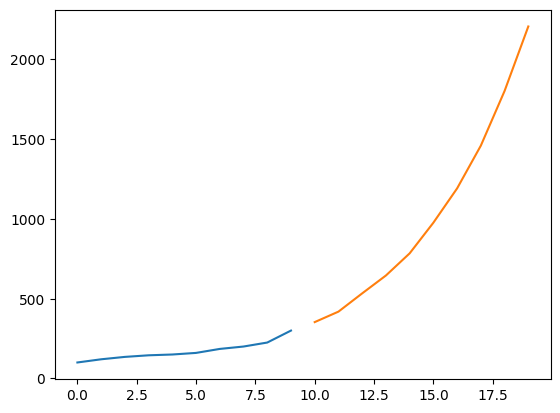

In [ ]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, output)
plt.show()